In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Prepare the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (needed for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.8955 - loss: 0.3429 - val_accuracy: 0.9867 - val_loss: 0.0484
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9905 - loss: 0.0314 - val_accuracy: 0.9845 - val_loss: 0.0481
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9915 - val_loss: 0.0315
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9917 - val_loss: 0.0356
313/313 - 2s - 5ms/step - accuracy: 0.9903 - loss: 0.0315

Test Accuracy: 0.9903


In [5]:
# Step 7: Visualize Predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [6]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array[i]):.2f}%)", color=color)

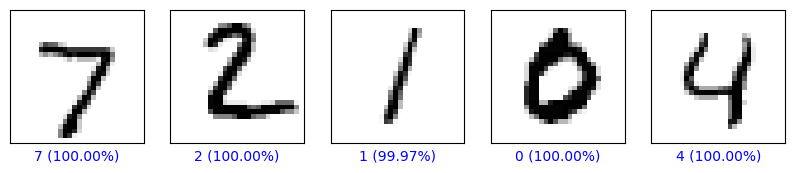

In [7]:
# Plot the first 5 predictions
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()